<a href="https://colab.research.google.com/github/ylmgrbzz/Housing-Data-Analysis-with-Machine-Learning-Random-Forest-Pandas-Numpy-Matplotlib/blob/main/Housing_Data_Analysis_with_Machine_Learning_Random_Forest_Pandas_Numpy_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [2]:
housing = pd.read_csv('housing.csv')


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


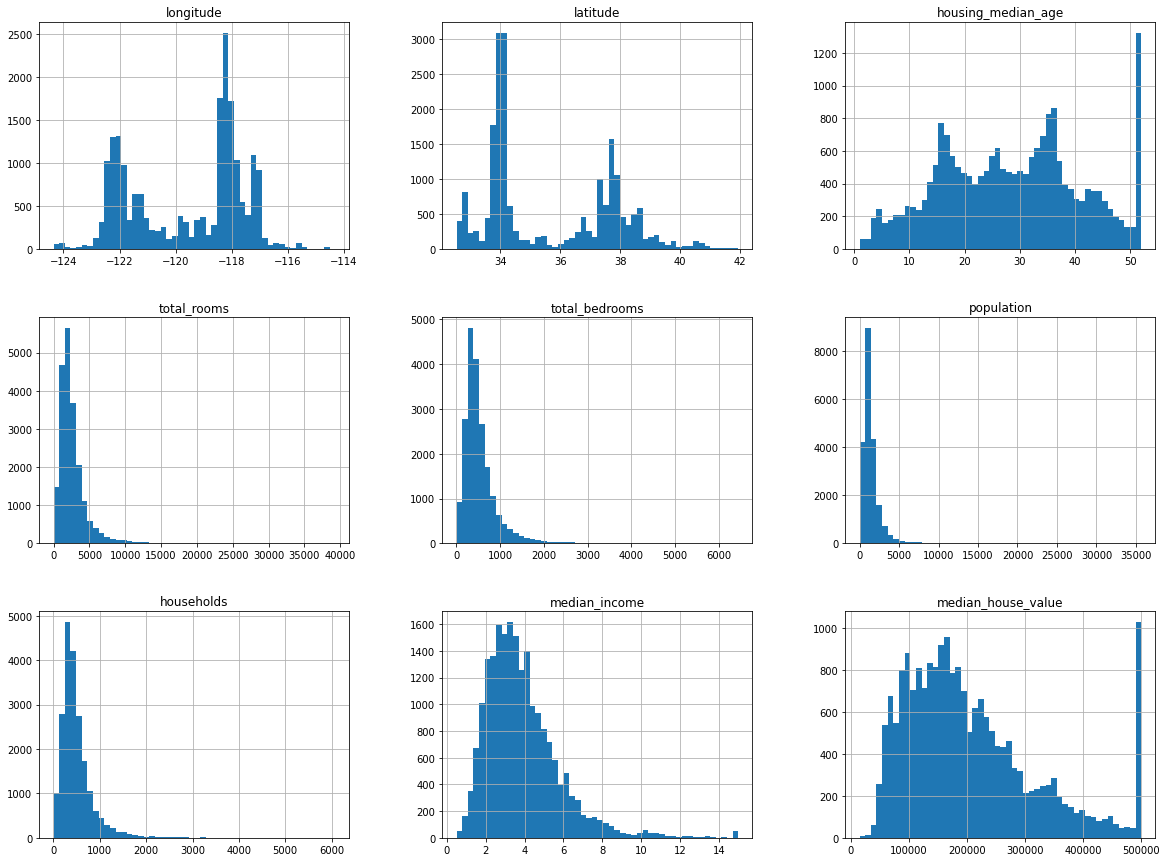

In [5]:

housing.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

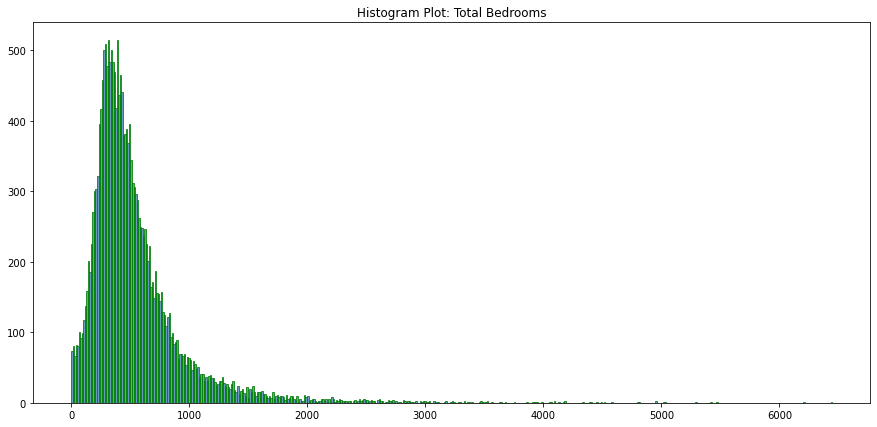

In [7]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Total Bedrooms')

total_bedrooms = housing['total_bedrooms']

plt.hist( total_bedrooms, bins=500, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.show()

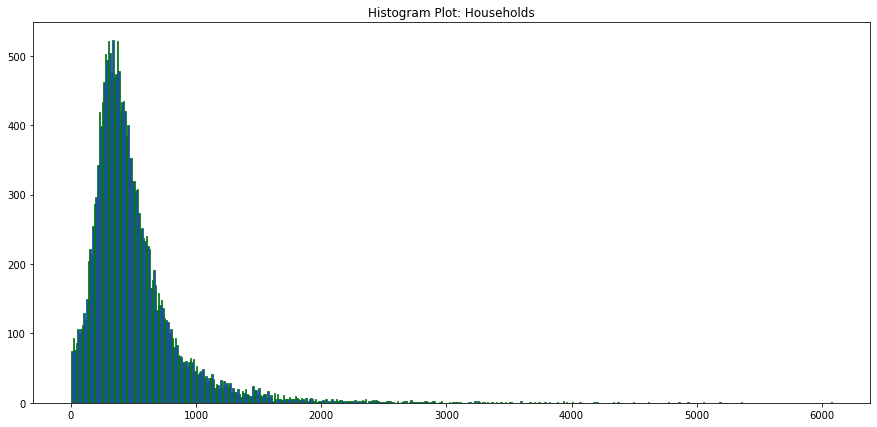

In [8]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Households')

households = housing['households']

plt.hist( households, bins=500, alpha=0.8,
          histtype='bar', color='blue',
          edgecolor='green')

plt.show()

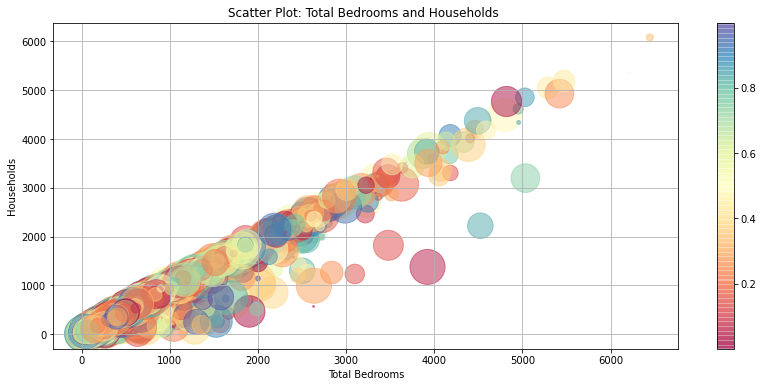

In [10]:
plt.figure(figsize=(14, 6))

plt.rcParams['axes.grid'] = True
plt.title('Scatter Plot: Total Bedrooms and Households ')


N = households.size
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 

plt.xlabel('Total Bedrooms')
plt.ylabel('Households')

plt.scatter(total_bedrooms, households, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

In [11]:
var_total_bedrooms = (np.square(total_bedrooms - total_bedrooms.mean())).sum() / (housing.shape[0] - 1)
var_households = (np.square(households - households.mean())).sum() / (housing.shape[0] - 1)
print(f'Variance of; (total bedrooms: {var_total_bedrooms}, import scipy.stats as stats: {var_households})')

Variance of; (total bedrooms: 175784.4754402569, import scipy.stats as stats: 146176.03990028054)


In [12]:
S_total_bedrooms = np.sqrt(var_total_bedrooms)
S_households = np.sqrt(var_households)
print(f'Standart deviation of; (total bedrooms: {S_total_bedrooms}, households: {S_households})')

Standart deviation of; (total bedrooms: 419.26659232552373, households: 382.32975283161073)


In [13]:
import scipy.stats as stats

tstat, pvalue = stats.ttest_ind_from_stats(total_bedrooms.mean(), S_total_bedrooms, total_bedrooms.size, households.mean(), S_households, households.size)
print(f't score: {tstat}, p score: {pvalue})')

t score: 9.705149779887096, p score: 3.0279724591955457e-22)


In [14]:
cov = ((total_bedrooms -  total_bedrooms.mean()) * (households - households.mean())).sum() / (housing.shape[0] - 1)
cov

156246.54825893574

In [15]:
corr = cov / (S_total_bedrooms * S_households)
corr

0.974724937213194

In [16]:
housing[['total_bedrooms','households']].corr()


,total_bedrooms,households
total_bedrooms,1.000000,0.979728
households,0.979728,1.000000


In [19]:
null_indexes = []
for (i, v) in housing["total_bedrooms"].iteritems():
    if pd.isna(v):
        null_indexes.append(i)
print(null_indexes)

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [20]:
values = []

for i in range(len(null_indexes)):
    values.append(housing["households"].iloc[null_indexes[i]])

print(values)

[218.0, 259.0, 1273.0, 146.0, 161.0, 557.0, 600.0, 1012.0, 540.0, 499.0, 626.0, 372.0, 1260.0, 928.0, 580.0, 224.0, 292.0, 243.0, 257.0, 669.0, 266.0, 91.0, 16.0, 584.0, 310.0, 902.0, 769.0, 623.0, 1200.0, 550.0, 737.0, 1492.0, 1280.0, 403.0, 677.0, 155.0, 528.0, 294.0, 312.0, 726.0, 422.0, 439.0, 290.0, 1179.0, 682.0, 1462.0, 439.0, 516.0, 187.0, 271.0, 475.0, 292.0, 245.0, 749.0, 231.0, 476.0, 302.0, 403.0, 771.0, 441.0, 339.0, 326.0, 530.0, 328.0, 727.0, 500.0, 497.0, 403.0, 1251.0, 474.0, 257.0, 155.0, 1012.0, 622.0, 357.0, 552.0, 221.0, 120.0, 452.0, 427.0, 1196.0, 212.0, 248.0, 629.0, 269.0, 130.0, 219.0, 270.0, 951.0, 287.0, 130.0, 1483.0, 132.0, 257.0, 112.0, 428.0, 393.0, 67.0, 72.0, 439.0, 437.0, 276.0, 423.0, 762.0, 541.0, 218.0, 522.0, 183.0, 622.0, 499.0, 351.0, 242.0, 1063.0, 996.0, 606.0, 512.0, 186.0, 1176.0, 202.0, 562.0, 281.0, 627.0, 375.0, 843.0, 611.0, 358.0, 107.0, 391.0, 532.0, 158.0, 375.0, 592.0, 201.0, 539.0, 390.0, 108.0, 499.0, 426.0, 268.0, 687.0, 246.0, 10

In [21]:
index = 0
for (i, v) in housing["total_bedrooms"].iteritems():
    if pd.isna(v):
        housing["total_bedrooms"].iloc[i] = values[index]
        index+=1

In [22]:
housing.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [23]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt



In [24]:
distance_count = housing['ocean_proximity'].value_counts()


In [25]:
distance_count

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

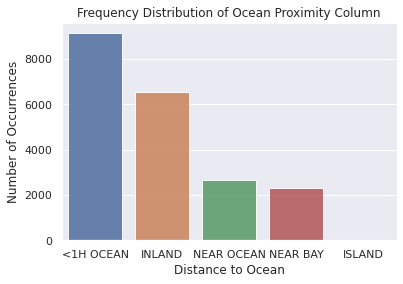

In [26]:
sns.set(style="darkgrid")
sns.barplot(distance_count.index, distance_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ocean Proximity Column')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distance to Ocean', fontsize=12)
plt.show()

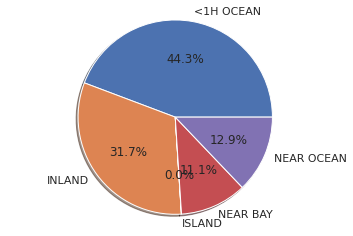

In [27]:
labels = housing['ocean_proximity'].astype('category').cat.categories.tolist()
counts =  housing['ocean_proximity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [28]:
print(housing['ocean_proximity'].value_counts())


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [29]:
replace_map = {'ocean_proximity': {'<1H OCEAN': 2, 'INLAND': 1, 'NEAR OCEAN': 4, 'NEAR BAY': 3,
                                  'ISLAND': 5}}

In [30]:
housing_replace = housing.copy()
housing_replace.replace(replace_map, inplace=True)
housing_replace.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [33]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [34]:
sample_outliers = []
for i in range(len(housing_replace.count()) - 1):
    sample_outliers.append(detect_outliers_zscore(housing_replace.iloc[:,i]))

In [35]:
sample_outliers 


[[],
 [],
 [],
 [12842.0,
  18634.0,
  14316.0,
  9963.0,
  16199.0,
  14917.0,
  10648.0,
  14014.0,
  10687.0,
  28258.0,
  9540.0,
  13182.0,
  9621.0,
  12070.0,
  20354.0,
  14701.0,
  9831.0,
  10265.0,
  14631.0,
  9217.0,
  14684.0,
  10191.0,
  12713.0,
  10093.0,
  9576.0,
  11336.0,
  14652.0,
  10212.0,
  17032.0,
  11444.0,
  15259.0,
  13255.0,
  10862.0,
  13802.0,
  10425.0,
  9351.0,
  12707.0,
  11609.0,
  10822.0,
  9664.0,
  9259.0,
  10860.0,
  9716.0,
  9902.0,
  9512.0,
  14912.0,
  11853.0,
  17377.0,
  11154.0,
  10111.0,
  9657.0,
  9320.0,
  10806.0,
  10722.0,
  9728.0,
  9430.0,
  14891.0,
  9659.0,
  14556.0,
  17715.0,
  16759.0,
  9610.0,
  9255.0,
  18448.0,
  11026.0,
  11250.0,
  17820.0,
  32054.0,
  9446.0,
  9197.0,
  18690.0,
  17527.0,
  21533.0,
  27700.0,
  9959.0,
  11989.0,
  14058.0,
  16414.0,
  16042.0,
  19059.0,
  9893.0,
  12139.0,
  10626.0,
  10239.0,
  10621.0,
  9559.0,
  9594.0,
  9944.0,
  9975.0,
  10731.0,
  13133.0,
  11016.0,


In [38]:
def replace_outliers(data, sample_index):
    median = np.median(data)
    index = 0
    if len(sample_outliers[sample_index]) == 0: 
        return
    for (i, v) in data.iteritems():
        if sample_outliers[sample_index][index] == v:
            data[i] = median
            if index < len(sample_outliers[sample_index]) - 1:
                index +=1

In [39]:
housing_outliers = housing_replace.copy()
for i in range(len(sample_outliers)):
    replace_outliers(housing_outliers.iloc[:,i], i)

In [40]:
df = pd.DataFrame(housing_replace.mean() , columns=['Mean with outliers'])
df['Mean without outliers'] = housing_outliers.mean()

df

,Mean with outliers,Mean without outliers
longitude,-119.569704,-119.569704
latitude,35.631861,35.631861
housing_median_age,28.639486,28.639486
total_rooms,2635.763081,2432.444380
total_bedrooms,537.591279,499.616231
population,1425.476744,1330.515068
households,499.539680,465.958285
median_income,3.870671,3.735332
median_house_value,206855.816909,206855.816909
ocean_proximity,2.051841,2.051841


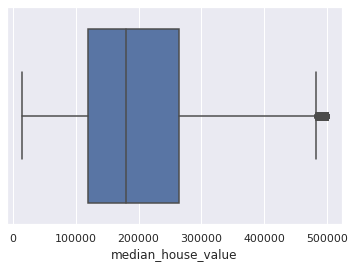

In [42]:
def detect_outliers_iqr(dataset):
    
    outliers = []
    dataset = sorted(dataset)
    q1,q3 = np.percentile(dataset, [25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    for i in range(dataset):
        if dataset[i] < lower_fence or dataset[i] > upper_fence:
            outliers.append(dataset[i])
    return outliers

import seaborn as sns

sns.boxplot(housing['median_house_value'])

In [43]:
cols = ['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value' ]

dataset = housing_outliers.copy()
dataset = dataset[cols]

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [44]:
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() 
print(f'Run time : {time_end - time_start}')

Run time : 7.644766092300415


In [49]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.9754180665391868
Testing score:   0.8222526143904582
Root Mean Squared Error: 48285.56908343134
